In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [91]:
!pwd

/Volumes/HDD750GB/Programs/Fisher/github/Wfirst/Core


In [41]:
df = pd.read_csv('../tt0_2.zphot',sep=' ',index_col=False)#,header=None)
df_w=pd.read_csv('../tt0_14.zphot',sep=' ',index_col=False)

df.columns   = ['id', 'ztrue', 'zphot', 'zphoterr', 'N_cm']
df_w.columns = ['id', 'ztrue', 'zphot', 'zphoterr', 'N_cm']

df = df.iloc[:, :-1]
df_w = df_w.iloc[:, :-1]

df   = df.sort_values(by=['ztrue'])   
df_w = df_w.sort_values(by=['ztrue'])   

In [43]:
# Based on : https://github.com/dirac-institute/CMNN_Photoz_Estimator/blob/master/cmnn_analysis.py
def CORiqrbias(zphot,ztrue):
    ###   thresh_COR : zspec-zphot threshold to define "catastrophic outlier rejection"
    thresh_COR = 1.5

    ### Identify the subset of catastrophic outlier-rejected test galaxies in the requested bin
    tx = np.where( ( np.abs( zphot - ztrue ) < thresh_COR ) )[0]
    CORzspec = ztrue[tx]
    CORzphot = zphot[tx]

    ### Define bin_dzo1pzp for use in all stats
    CORdzo1pzp = ( CORzspec - CORzphot ) / ( float(1.0) + CORzphot )
    CORdzo1pzp=np.array(CORdzo1pzp)
    ### COR Intraquartile Range
    q75, q25   = np.percentile( CORdzo1pzp, [75 ,25] )
    CORIQR     = ( q75 - q25 )
    CORIQRstdd = ( q75 - q25 ) / float(1.349)
    tx         = np.where( ( CORdzo1pzp > q25 ) & ( CORdzo1pzp < q75 ) )[0]

    CORIQRbias = np.mean( CORdzo1pzp[tx] )
    return CORIQRbias

In [86]:
def bias(df):
    bins = np.linspace(0,3.3,34)
    label = np.linspace(0.05,3.25,33)
    
    df['bin_z'] = pd.cut(df.ztrue, bins=bins, labels=label)
    df = df[df['bin_z'].notna()]
    N=[];cor=[];zp=[];zs=[];
    for each in label:
        x = df[df['bin_z'] == each]
        N.append(len(x))
        cor.append(CORiqrbias(np.array(x.zphot),np.array(x.ztrue))) # Call the COR_IQR Function
        zp.append(np.mean(x.zphot))
        zs.append(np.mean(x.ztrue))
    N = pd.DataFrame(np.array(N))
    #N.columns = ['N']
    N.reset_index(drop=True, inplace=True)
    cor = pd.DataFrame(cor)
    zs = pd.DataFrame(zs)
    zp = pd.DataFrame(zp)
    l = pd.DataFrame(label)   
    N =  pd.concat([l,N,zs,zp,cor],axis=1,ignore_index=True)
    N.columns = ['z','N','z_true','zphot','bias']
    N = N.iloc[0:12 , : ] # 12 Bins
    return N

In [87]:
b_w= bias(df_w)
b = bias(df)

Text(0, 0.5, 'CORE Bias')

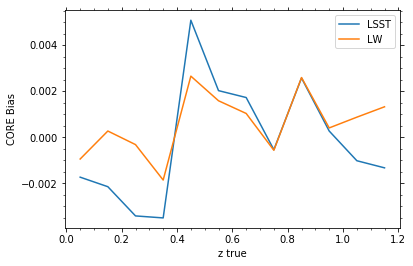

In [88]:
fig, ax = plt.subplots()
plt.plot(b.z,b.bias,label='LSST')
plt.plot(b_w.z,b_w.bias,label='LW')
plt.legend()
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.xlabel('z true')
plt.ylabel('CORE Bias')

In [89]:
b.to_csv('interpolated_LSST.csv',sep = ' ',index = False)
b_w.to_csv('interpolated_LW.csv',sep = ' ',index = False)

In [90]:
print('LSST_NEW                             LW')
display_side_by_side(b,b_w)

LSST_NEW                             LW


,z,N,z_true,zphot,bias
0,0.05,1304,0.079959,0.249671,-0.001737
1,0.15,2478,0.159753,0.405953,-0.002150
2,0.25,9714,0.251158,0.395165,-0.003419
3,0.35,9135,0.346542,0.456567,-0.003506
4,0.45,15323,0.452942,0.491368,0.005078
5,0.55,16020,0.554612,0.570695,0.002021
6,0.65,17236,0.645302,0.662661,0.001721
7,0.75,14547,0.754403,0.762372,-0.000543
8,0.85,12712,0.844574,0.850553,0.002570
9,0.95,13552,0.954429,0.971172,0.000268


In [92]:
lsst_old = pd.read_csv('../../interpolated_new_2.csv',sep =' ' )# cormean, CORbias. new2 = Cormean,CorIQRbias

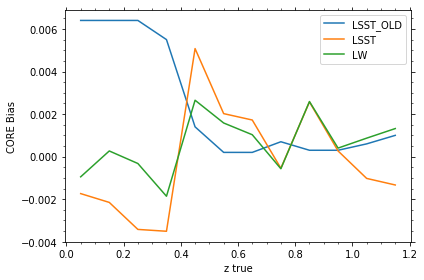

In [98]:
fig, ax = plt.subplots()
plt.plot(lsst_old.z,lsst_old.bias,label='LSST_OLD')
plt.plot(b.z,(b.bias),label='LSST')
plt.plot(b_w.z,(b_w.bias),label='LW')
plt.legend()
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.xlabel('z true')
plt.ylabel('CORE Bias')
plt.tight_layout()
#plt.savefig('../Plot/Core_Bias.pdf',bbox_inches='tight')